# Ensembling Technique
#### There are different types of Ensumbling Technique

        1. Naive Aggregation
            a. Hard Voting
        2. Bootstrapping
            a. Bagging      b. pasting      c. Random Forest Tree
        3. Boosting Technique
            a. ADA Boost(Adaptor Boosting)
            b. Gradient Boosting
            c. Extreme Gradient Boosting (XG Boost)

In [1]:
#Ensembling Technique : -
#1. Naive Aggregation Technique : -
#a. hard voting and soft voting
#use same dataset : bank.csv
#Work on dataset bank.csv
#classification algorithm 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # to avoid the warnings during executing the program
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [3]:
# Check the null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

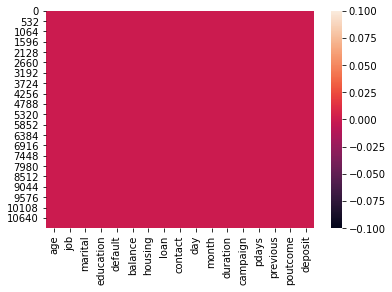

In [4]:
sns.heatmap(df.isnull())
plt.show()

In [5]:
# Check the Datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
# Selecting the input and output variable from dataset
X = df.drop("deposit",axis=1)  # Select all input features except deposit 
Y = df["deposit"]  # Select target variable or Output Variable

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [9]:
# Creaet the define function
def create_model(model):
    model.fit(X_train,Y_train)   # Train the model
    Y_pred=model.predict(X_test) # Test the model
    print(classification_report(Y_test,Y_pred))
    print("CONFUSION MATRIX")
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [10]:
# Ensembling Technique
# Naive Aggregation
   # a. HARD VOTING
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [11]:
#First create object of Logistic Regression class 
lr=LogisticRegression()

#Second take DecisionTreeClassifier : gini index
#Create the object of DecisionTreeClassifier  class
dt1=DecisionTreeClassifier() #bydefault method gini index

#Third take DecisionTreeClassifier : entropy method
#Create the object of DecisionTreeClassifier  class
dt2=DecisionTreeClassifier(criterion="entropy")

In [12]:
# Begin with simple first 
# Create the model list
model_list = [("logistic",lr),("DecisionTree_Gini",dt1),("DecisionTree_Entropy",dt2)]
# ("Model_name string type",object of those model)
# models in the list because super function instead of dictionary function 
# which gives the " unpack error "

In [13]:
# Then we need Naive Aggregation
# We importing class
from sklearn.ensemble import VotingClassifier

In [14]:
# Create the object of VotingClassifier and passing thge parameter 
# model_list
vc = VotingClassifier(estimators=model_list) # Bydefault hard voting 

In [15]:
# Call the function
vc = create_model(vc)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

CONFUSION MATRIX
[[1458  302]
 [ 308 1281]]


In [16]:
# Soft Voting 
# Create the object of the VotingClassifier and passing the parameter 
# model_list
vc1 = VotingClassifier(estimators=model_list,voting="soft")
# by default hard voting

In [17]:
# Call the function
vc1=create_model(vc1)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1760
           1       0.81      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

CONFUSION MATRIX
[[1451  309]
 [ 287 1302]]


# Bootstapping Ensembling Technique
     The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement.
          1. Bagging
          2. Pasting
          3. Rnadom Forest Tree
    Difference between Bagging and pasting classifier : - 
    In bagging classifier ,  the model is train with different samples with replacement.
    while other hand  in pasting , the model is train with different samples without replacement
Only on one algorithms we can train the dataset

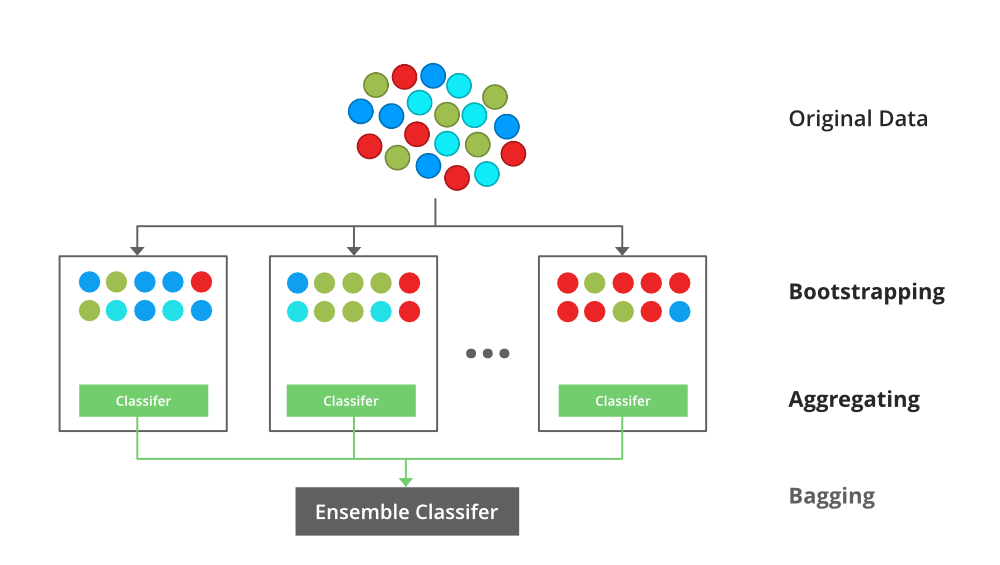

In [18]:
# 1. Bagging method
from sklearn.ensemble import BaggingClassifier

In [19]:
# Create the object of BaggingClassifier class
bc = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=781,random_state=1)
# (name_alogrithms,how_many time algorithm, no. of records )

In [20]:
X_train.shape

(7813, 16)

In [21]:
# Call the function
bc = create_model(bc)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1760
           1       0.78      0.72      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.77      0.77      3349
weighted avg       0.78      0.77      0.77      3349

CONFUSION MATRIX
[[1445  315]
 [ 440 1149]]


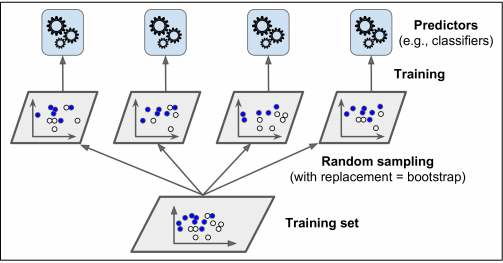

###  Pasting :

In [22]:
# Create the object of BaggingClassifier class
bc1 = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=781,
                       random_state=1,bootstrap=False)
# False means by default it take " True " Bagging Classifier
# (name_alogrithms,how_many time algorithm, no. of records )

In [23]:
# Call the function
bc1 = create_model(bc1)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1760
           1       0.78      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349

CONFUSION MATRIX
[[1432  328]
 [ 427 1162]]


### Random Forest Tree:

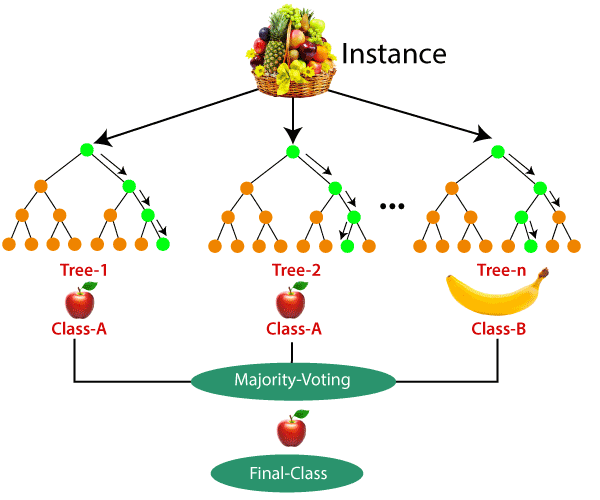

In [24]:
# Create the object of BaggingClassifier class
bc2 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=781,
                       random_state=1)
# False means by default it take " True " Bagging Classifier
# (name_alogrithms,how_many time algorithm, no. of records )

In [25]:
# Call the function
bc2 = create_model(bc2)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1760
           1       0.80      0.76      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

CONFUSION MATRIX
[[1456  304]
 [ 389 1200]]


In [26]:
# Random Forest Tree
# Call the random forest tree from package.
# This will remove the overfitting of the dataset.
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Create the object of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)

In [28]:
# Call the function
rfc = create_model(rfc)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1760
           1       0.82      0.83      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

CONFUSION MATRIX
[[1477  283]
 [ 271 1318]]


In [29]:
# Show features
rfc.feature_importances_

array([0.08632402, 0.03549075, 0.01781122, 0.01999328, 0.00110177,
       0.08722873, 0.03323366, 0.01006869, 0.03855632, 0.0690402 ,
       0.08415725, 0.37724782, 0.02753249, 0.05252601, 0.01615529,
       0.0435325 ])

In [30]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

###  Stacking classifier

In [31]:
# First install the library
# !pip install mlxtend

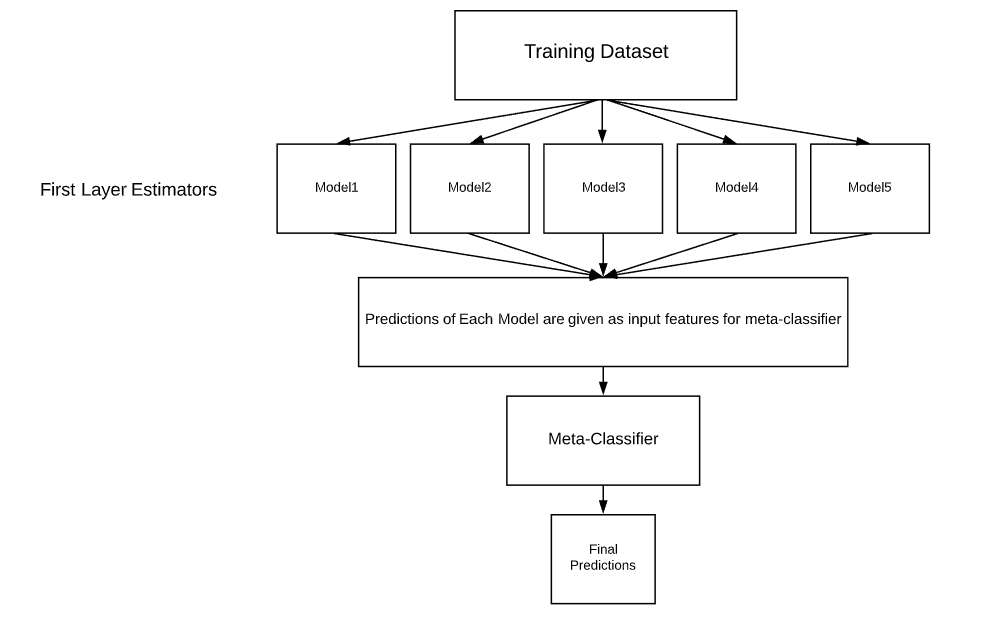

In [32]:
# StackingClassifier inbuilt class which define in inbuilt package mlxtend.classifier
# Call StackClassifier
from mlxtend.classifier import StackingClassifier

In [33]:
# Create the object of LogisticRegression, DecisionTree Entropy and Decision Tree Gini
lr = LogisticRegression()
dt1 = DecisionTreeClassifier(criterion='entropy')
dt2 = DecisionTreeClassifier() # any default gini index

In [34]:
# Take the LogisticRegression Algorithnms for the metaclassifier
# Also create a object of LogisticRegression
meta = LogisticRegression()

In [35]:
# Create the model list
model_list = [lr,dt1,dt2]

In [36]:
# Create the object of StackingClassifier Class and passing the parameters
sc = StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [37]:
sc = create_model(sc)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

CONFUSION MATRIX
[[1450  310]
 [ 305 1284]]


### Boosting Technique

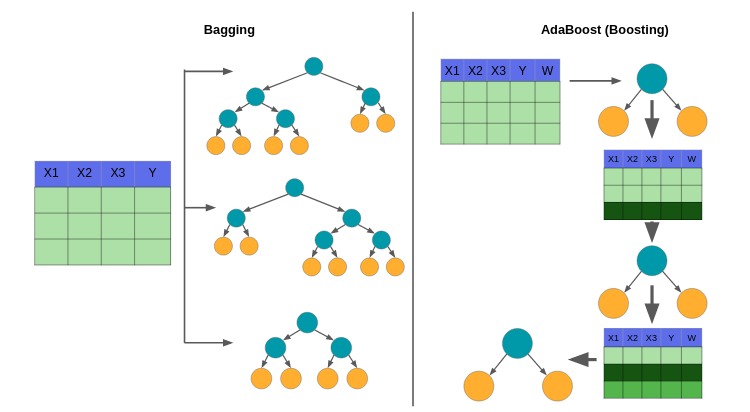

In [38]:
# ADA Boost
from sklearn.ensemble import AdaBoostClassifier
# AdaptorClassifier inbuilt class for ADA Boost , call this class from sklearn ensemble i.e Package

In [39]:
#Create the object of AdaBoostClassifier class and passing the no. of parameter
#in this class
ada=AdaBoostClassifier(n_estimators=75) # n_estimators can be <=100
#AdaBoost create a decision stump means understood use model
#DecisionTreeClassifier

In [40]:
# Call the function
ada = create_model(ada) # Ada boost makes the decision stump so, we doesn't make the object 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1760
           1       0.83      0.81      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

CONFUSION MATRIX
[[1493  267]
 [ 309 1280]]


### Gradient Boosting

In [41]:
#call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
# Create the object of GradientBoostingClassifier class
gbc = GradientBoostingClassifier(n_estimators= 75) # not <= 100

In [43]:
# Call the funciton
gbc = create_model(gbc)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1760
           1       0.81      0.86      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

CONFUSION MATRIX
[[1437  323]
 [ 228 1361]]


###  Extreame Gradient Boosting  : 3rd technique of Boosting

In [44]:
#install the external package from python community first for XGBoost
!pip install xgboost

In [45]:
from xgboost import XGBClassifier

In [51]:
# Create the object 
xg = XGBClassifier(n_estimators = 40,reg_alpha = 1)
# Automatic overfitting : reg means regularization and alpha or lmabda = pyprtparameter

In [50]:
# call the funciton
xg = create_model(xg)

[17:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.86      0.85      0.85      3349

CONFUSION MATRIX
[[1458  302]
 [ 190 1399]]
